In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
testbed = 2000
a = 10
max_steps = 1000

qstar = np.random.normal(0, 1, (a, testbed))

In [34]:
def epgreedy_methods(qstar, eps):
    
    N = np.zeros(a)
    Q = np.zeros(a)
    rewards = np.zeros(max_steps)
    
    for b in range(max_steps):
        if np.random.uniform() > eps:
            idx_max_action = Q.argmax()
        else:
            idx_max_action = np.random.randint(a)

        N[idx_max_action] += 1
        noise = np.random.normal(0, 1)
        reward = qstar[idx_max_action] + noise
        Q[idx_max_action] = (Q[idx_max_action] + reward) / N[idx_max_action]
        rewards[b] = reward
    return rewards

In [45]:
mean1 = np.zeros(max_steps)
mean2 = np.zeros(max_steps)
mean3 = np.zeros(max_steps)

for t in range(testbed):
    mean1 += epgreedy_methods(qstar[:, t], 0)
    mean2 += epgreedy_methods(qstar[:, t], 0.1)
    mean3 += epgreedy_methods(qstar[:, t], 0.01)
    
mean1 /= testbed
mean2 /= testbed
mean3 /= testbed

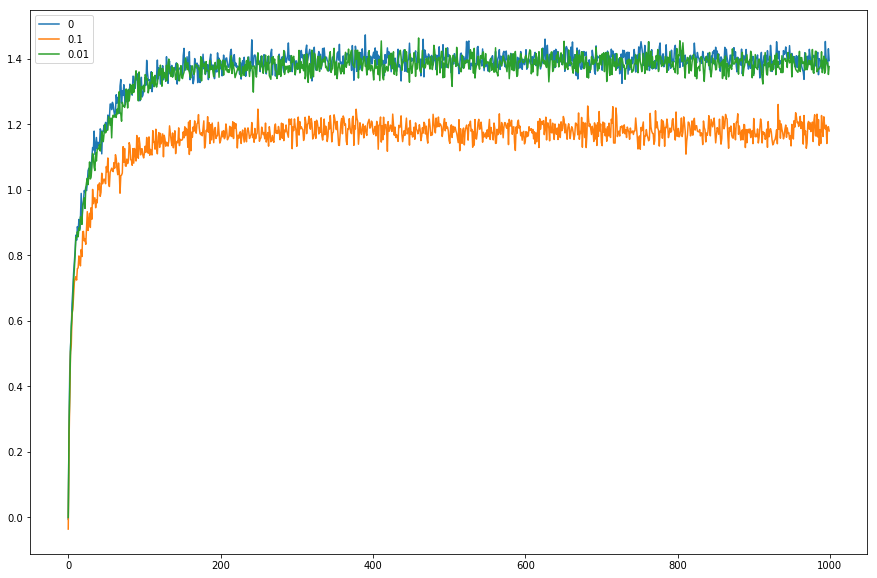

In [46]:
plt.figure(figsize=(15, 10))
plt.plot(mean1, label='0')
plt.plot(mean2, label='0.1')
plt.plot(mean3, label='0.01')
plt.legend()